In [1]:
import pandas as pd
import re
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
rates = pd.read_csv('dog_rates_tweets.csv', parse_dates=['created_at'])

In [3]:
data = rates[rates['text'].str.contains(r'(\d+(\.\d+)?)/10')]

C:\Users\ericz\AppData\Local\Temp\ipykernel_16408\3666596745.py:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  data = rates[rates['text'].str.contains(r'(\d+(\.\d+)?)/10')]


In [4]:
def get_rate(data):
    match = re.search(r'(\d+(\.\d+)?)/10', data)
    return float(match.group(1))

In [5]:
data['rating'] = data['text'].map(get_rate)

C:\Users\ericz\AppData\Local\Temp\ipykernel_16408\406036065.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['rating'] = data['text'].map(get_rate)


In [6]:
data = data.drop(data[data['rating']<0].index)
data = data.drop(data[data['rating']>25].index)

In [7]:
def to_timestamp(data):
    return data.timestamp()

In [8]:
data['timestamp'] = data['created_at'].apply(to_timestamp)

In [9]:
rateSlope,rateIntercept,rvalue, pvalue, stderr = stats.linregress(data['timestamp'].values,data['rating'].values)

# Results

In [10]:
data['prediction']= data['timestamp']*rateSlope + rateIntercept

In [11]:
data

,id,created_at,text,rating,timestamp,prediction
2,994363623421153280,2018-05-09 23:48:56,This is Louie. He has misplaced his Cheerio. W...,14.0,1.525935e+09,12.303514
7,993889039714578432,2018-05-08 16:23:07,This is Manny. He hasn’t seen your croissant. ...,13.0,1.525822e+09,12.301817
8,993629544463642624,2018-05-07 23:11:58,This is Libby. She leap. 14/10\n(IG: libbythef...,14.0,1.525760e+09,12.300888
24,992198572664860672,2018-05-04 00:25:48,This is Rosie. She thought Coachella was this ...,13.0,1.525419e+09,12.295770
30,991744041351090177,2018-05-02 18:19:39,This is Riley. He’ll be your chauffeur this ev...,13.0,1.525310e+09,12.294144
...,...,...,...,...,...,...
14885,1275493485085245440,2020-06-23 18:18:39+00:00,This is Ruth. She was spotted at a rally doing...,14.0,1.592936e+09,13.308733
14895,1275102054608855040,2020-06-22 16:23:14+00:00,This is Narcos. He is very angry with you. The...,13.0,1.592843e+09,13.307333
14896,1274821722584125442,2020-06-21 21:49:18+00:00,@PatrickKenneyMD omg i’d say 13/10 but i’d hat...,13.0,1.592776e+09,13.306330
14906,1273774320519483392,2020-06-19 00:27:18+00:00,This is Oakley. He’s on his way home for the f...,12.0,1.592526e+09,13.302583


In [12]:
rateSlope,rateIntercept

(1.500295334373573e-08, -10.590016533606498)

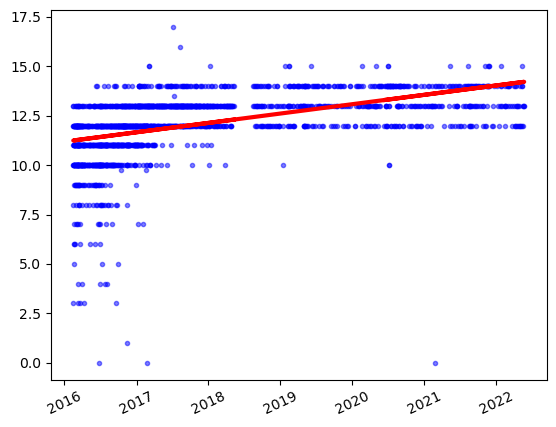

In [13]:
plt.xticks(rotation=25)
plt.plot(data['created_at'].values, data['rating'].values, 'b.', alpha=0.5)
plt.plot(data['created_at'].values, data['prediction'].values, 'r-', linewidth=3)
plt.show()

In [14]:
pvalue

2.536058725134726e-127

In [15]:
data['residuals'] = data['rating'] - data['prediction']

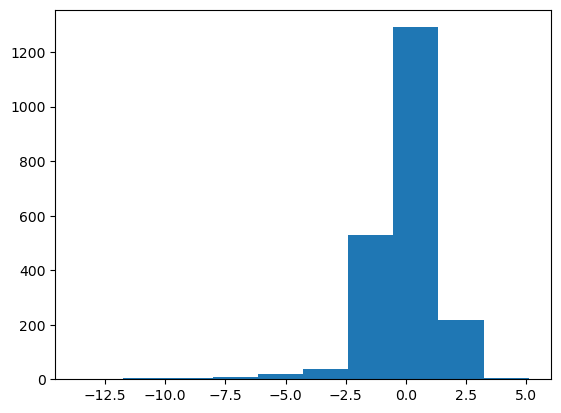

In [16]:
plt.hist(data['residuals'])
plt.show()